In [1]:
import pandas as pd
from darts import TimeSeries

# Read CSV File containing Time Series Data:
df = pd.read_csv('saputf8.csv', delimiter=";")
df.iloc[:, 1:8] = df.iloc[:, 1:8].replace(',\d*', '', regex=True)
df.iloc[:, 1:8] = df.iloc[:, 1:8].astype(float)
df.head()
df.shape[0]

96

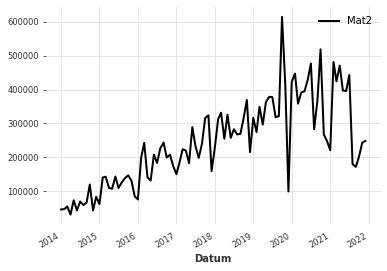

In [2]:
# Convert Dataframe into Darts TimeSeries Object and split into training and validation set.
# 72 months training, 24 months validation
material = 'Mat2'
series = TimeSeries.from_dataframe(df, 'Datum', material)
train, val = series[:-24], series[-24:]
series.plot()

There is seasonality of order 4.
There is seasonality of order 12.
There is seasonality of order 20.


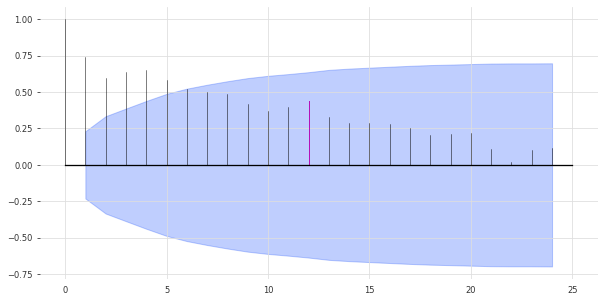

In [3]:
# Inspect Seasonality using auto-correlation function:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

In [4]:
# Import Exponential Smoothing Model:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

/home/anton/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


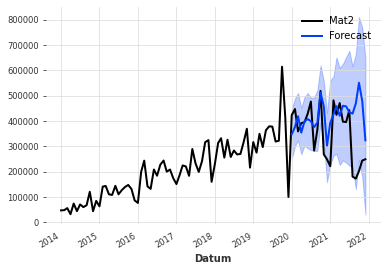

In [5]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='Forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [6]:
from darts.metrics import mape, mae, rmse

print("Mean absolute percentage error (MAPE): {:.2f}%.".format(mape(series, prediction) ) )
print("Mean absolute error (MAE): {:.2f}.".format(mae(series, prediction) ) )
print("Root mean squared error (RMSE): {:.2f}.".format(rmse(series, prediction) ) )

Mean absolute percentage error (MAPE): 40.28%.
Mean absolute error (MAE): 98437.79.
Root mean squared error (RMSE): 136376.13.
